In [1824]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('/home/tinkering/Downloads/sg_challenge')

In [1825]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [1826]:
train.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,PF00001002,DSK00001001,OFF00001002,B,20040720,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,20040720,NaN,20040812,B,NaN,NaN,0.02496
1,PF00001003,DSK00001002,OFF00001001,A,20040709,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,20040723,NaN,20040812,C,NaN,NaN,0.05496
2,PF00001005,DSK00001004,OFF00001001,A,20040723,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,20040723,NaN,20040817,A,NaN,NaN,0.02496
3,PF00001006,DSK00001005,OFF00001001,A,20040609,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,20040723,NaN,20040713,A,NaN,NaN,0.02496
4,PF00001007,DSK00001005,OFF00001002,B,20040609,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,20040723,NaN,20040713,B,NaN,NaN,0.02496


In [1827]:
train.describe()

,start_date,sold,euribor_rate,libor_rate,bought,creation_date,sell_date,return
count,9.366000e+03,9.364000e+03,9366.000000,8892.000000,9.364000e+03,9.366000e+03,9.366000e+03,9366.000000
mean,2.011706e+07,1.019740e+08,0.009383,0.998066,1.018914e+08,2.011706e+07,2.011770e+07,0.014100
std,3.052996e+04,1.928066e+08,0.013298,1.457977,1.927472e+08,3.052372e+04,3.060900e+04,0.020549
min,2.004041e+07,1.100000e+00,-0.003740,-0.667095,1.099698e+00,2.004072e+07,2.004071e+07,-0.009600
25%,2.010020e+07,2.763200e+07,0.000980,0.244490,2.761285e+07,2.010020e+07,2.010023e+07,0.003000
50%,2.011120e+07,5.517050e+07,0.004390,0.531983,5.512056e+07,2.011120e+07,2.011121e+07,0.005400
75%,2.014071e+07,1.144632e+08,0.013510,1.109959,1.144459e+08,2.014071e+07,2.014083e+07,0.014520
max,2.017103e+07,1.320000e+10,0.050880,6.379137,1.320000e+10,2.017103e+07,2.017103e+07,0.778441


In [1828]:
train.isnull().sum()

portfolio_id         0
desk_id           3665
office_id            0
pf_category          0
start_date           0
sold                 2
country_code         0
euribor_rate         0
currency             0
libor_rate         474
bought               2
creation_date        0
indicator_code    5699
sell_date            0
type                 0
hedge_value       5701
status            3084
return               0
dtype: int64

In [1829]:
test.isnull().sum()

portfolio_id         0
desk_id           1948
office_id            0
pf_category          0
start_date           0
sold                 0
country_code         0
euribor_rate         0
currency             0
libor_rate         265
bought               0
creation_date        0
indicator_code    2851
sell_date            0
type                 0
hedge_value       2851
status            1457
dtype: int64

In [1830]:
#convert dates to strings

train.start_date = train.start_date.astype(str)
test.start_date = test.start_date.astype(str)

train.creation_date = train.creation_date.astype(str)
test.creation_date = test.creation_date.astype(str)

train.sell_date = train.sell_date.astype(str)
test.sell_date = test.sell_date.astype(str)

In [1831]:
#convert dates to standard datetime format

def info_from_date(x):
    x = x[:4] + '-' + x[4:6] + '-' + x[6:]
    return x

train.start_date = pd.to_datetime(train.start_date.map(lambda x:info_from_date(x)))
test.start_date = pd.to_datetime(test.start_date.map(lambda x:info_from_date(x)))

train.creation_date = pd.to_datetime(train.creation_date.map(lambda x:info_from_date(x)))
test.creation_date = pd.to_datetime(test.creation_date.map(lambda x:info_from_date(x)))


train.sell_date = pd.to_datetime(train.sell_date.map(lambda x:info_from_date(x)))
test.sell_date = pd.to_datetime(test.sell_date.map(lambda x:info_from_date(x)))

In [1832]:
train.dtypes

portfolio_id              object
desk_id                   object
office_id                 object
pf_category               object
start_date        datetime64[ns]
sold                     float64
country_code              object
euribor_rate             float64
currency                  object
libor_rate               float64
bought                   float64
creation_date     datetime64[ns]
indicator_code            object
sell_date         datetime64[ns]
type                      object
hedge_value               object
status                    object
return                   float64
dtype: object

In [1833]:
training_set = train.drop(labels = ['portfolio_id', 'desk_id', 'indicator_code', 'hedge_value', 'status'], axis = 1)
test_set = test.drop(labels = ['portfolio_id', 'desk_id', 'indicator_code', 'hedge_value', 'status'], axis = 1)

In [1834]:
training_set.head()

,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,sell_date,type,return
0,OFF00001002,B,2004-07-20,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,2004-07-20,2004-08-12,B,0.02496
1,OFF00001001,A,2004-07-09,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,2004-07-23,2004-08-12,C,0.05496
2,OFF00001001,A,2004-07-23,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,2004-07-23,2004-08-17,A,0.02496
3,OFF00001001,A,2004-06-09,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,2004-07-23,2004-07-13,A,0.02496
4,OFF00001002,B,2004-06-09,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,2004-07-23,2004-07-13,B,0.02496


In [1835]:
training_set.office_id.value_counts()

OFF00001002    6458
OFF00001001    2908
Name: office_id, dtype: int64

In [1836]:
test_set.office_id.value_counts()

OFF00001002    3300
OFF00001001    1501
Name: office_id, dtype: int64

In [1837]:
from sklearn.preprocessing import LabelEncoder

In [1838]:
lbl_office = LabelEncoder()
lbl_pf = LabelEncoder()
lbl_country = LabelEncoder()
lbl_currency = LabelEncoder()
lbl_type = LabelEncoder()

In [1839]:
training_set.office_id = lbl_office.fit_transform(training_set.office_id)
test_set.office_id = lbl_office.transform(test_set.office_id)

training_set.pf_category = lbl_pf.fit_transform(training_set.pf_category)
test_set.pf_category = lbl_pf.transform(test_set.pf_category)

training_set.country_code = lbl_country.fit_transform(training_set.country_code)
test_set.country_code = lbl_country.transform(test_set.country_code)

training_set.currency = lbl_currency.fit_transform(training_set.currency)
test_set.currency = lbl_currency.transform(test_set.currency)

training_set.type = lbl_type.fit_transform(training_set.type)
test_set.type = lbl_type.transform(test_set.type)

In [1840]:
training_set.head()

,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,sell_date,type,return
0,1,1,2004-07-20,110000000.0,2,0.02074,4,2.332216,1.098097e+08,2004-07-20,2004-08-12,1,0.02496
1,0,0,2004-07-09,176671000.0,1,0.02074,2,5.269617,1.760084e+08,2004-07-23,2004-08-12,2,0.05496
2,0,0,2004-07-23,56474000.0,2,0.02074,4,2.332216,5.637953e+07,2004-07-23,2004-08-17,0,0.02496
3,0,0,2004-06-09,164813000.0,2,0.02074,4,2.332216,1.645088e+08,2004-07-23,2004-07-13,0,0.02496
4,1,1,2004-06-09,140800000.0,2,0.02074,4,2.332216,1.405402e+08,2004-07-23,2004-07-13,1,0.02496


In [1841]:
training_set['start_year'] = training_set.start_date.dt.year
training_set['start_month'] = training_set.start_date.dt.month
training_set['start_week'] = training_set.start_date.dt.week
training_set['start_day'] = training_set.start_date.dt.day

test_set['start_year'] = test_set.start_date.dt.year
test_set['start_month'] = test_set.start_date.dt.month
test_set['start_week'] = test_set.start_date.dt.week
test_set['start_day'] = test_set.start_date.dt.day

In [1842]:
training_set['creation_year'] = training_set.creation_date.dt.year
training_set['creation_month'] = training_set.creation_date.dt.month
training_set['creation_week'] = training_set.creation_date.dt.week
training_set['creation_day'] = training_set.creation_date.dt.day

test_set['creation_year'] = test_set.creation_date.dt.year
test_set['creation_month'] = test_set.creation_date.dt.month
test_set['creation_week'] = test_set.creation_date.dt.week
test_set['creation_day'] = test_set.creation_date.dt.day

In [1843]:
training_set['sell_year'] = training_set.sell_date.dt.year
training_set['sell_month'] = training_set.sell_date.dt.month
training_set['sell_week'] = training_set.sell_date.dt.week
training_set['sell_day'] = training_set.sell_date.dt.day

test_set['sell_year'] = test_set.sell_date.dt.year
test_set['sell_month'] = test_set.sell_date.dt.month
test_set['sell_week'] = test_set.sell_date.dt.week
test_set['sell_day'] = test_set.sell_date.dt.day

In [1844]:
#Country code and currency are the same variables

training_set = training_set.drop(labels = ['start_date', 'creation_date', 'sell_date', 'return', 'currency'], axis = 1)
test_set = test_set.drop(labels = ['start_date', 'creation_date', 'sell_date', 'currency'], axis = 1)
target = train['return']

In [1845]:
training_set.sold = training_set.sold.fillna(np.mean(training_set.sold))
test_set.sold = test_set.sold.fillna(np.mean(test_set.sold))

training_set.libor_rate = training_set.libor_rate.fillna(method = 'bfill', axis = 0)
test_set.libor_rate = test_set.libor_rate.fillna(method = 'bfill', axis = 0)

training_set.bought = training_set.bought.fillna(np.mean(training_set.bought))
test_set.bought = test_set.bought.fillna(np.mean(test_set.bought))

In [1846]:
from sklearn.model_selection import train_test_split

In [1847]:
x_data, x_test, y_data, y_test = train_test_split(training_set, target, test_size = 0.1, random_state = 0)
x_data = x_data.reset_index(drop = True)
y_data = y_data.reset_index(drop = True)
x_test = x_test.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [1848]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size = 0.2, random_state = 0)
x_train = x_train.reset_index(drop = True)
x_val = x_val.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_val = y_val.reset_index(drop = True)

In [1849]:
x_train.isnull().sum()

office_id         0
pf_category       0
sold              0
country_code      0
euribor_rate      0
libor_rate        0
bought            0
type              0
start_year        0
start_month       0
start_week        0
start_day         0
creation_year     0
creation_month    0
creation_week     0
creation_day      0
sell_year         0
sell_month        0
sell_week         0
sell_day          0
dtype: int64

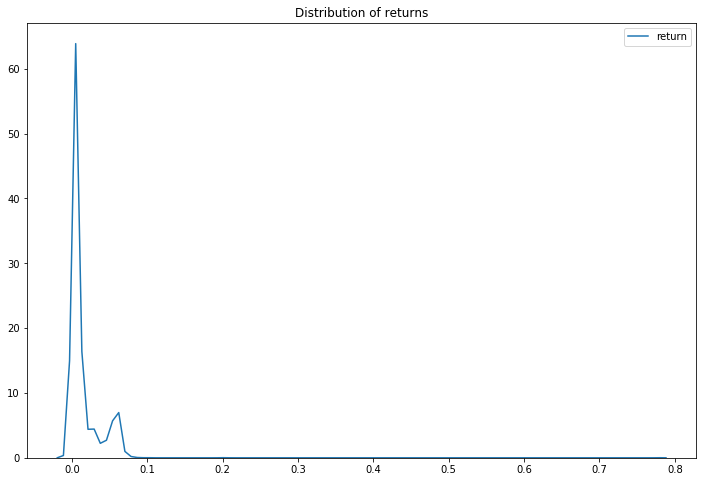

In [1850]:
#distribution of returns
plt.figure(figsize = (12, 8))
plt.title('Distribution of returns')
sns.kdeplot(target)
plt.show()

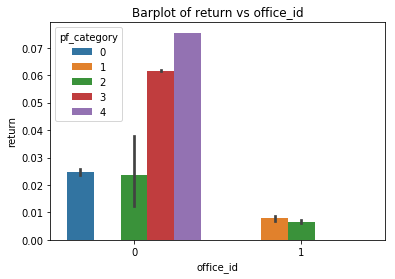

In [1851]:
sns.barplot(x_train['office_id'], y_train, hue = x_train.pf_category)
plt.title('Barplot of return vs office_id')
plt.show()

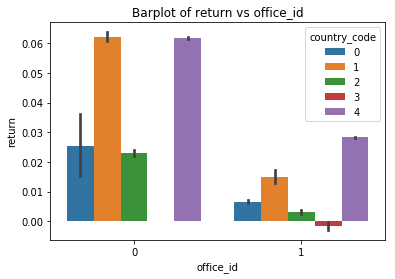

In [1852]:
sns.barplot(x_train['office_id'], y_train, hue = x_train.country_code)
plt.title('Barplot of return vs office_id')
plt.show()

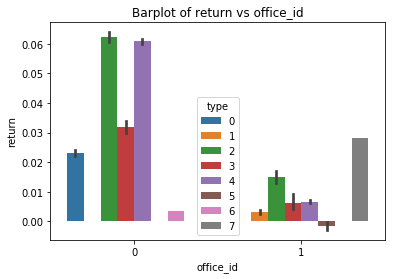

In [1853]:
sns.barplot(x_train['office_id'], y_train, hue = x_train.type)
plt.title('Barplot of return vs office_id')
plt.show()

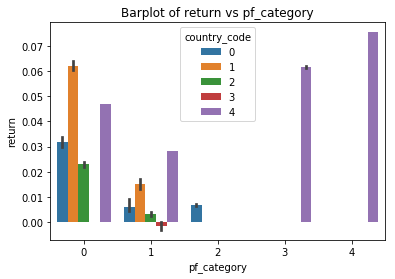

In [1854]:
sns.barplot(x_train['pf_category'], y_train, hue = x_train.country_code)
plt.title('Barplot of return vs pf_category')
plt.show()

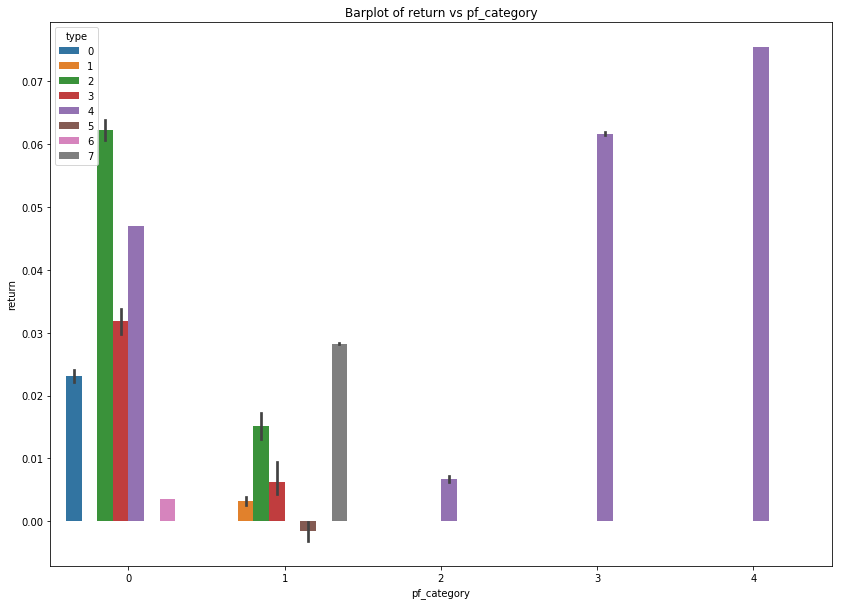

In [1855]:
plt.figure(figsize = (14, 10))
sns.barplot(x_train['pf_category'], y_train, hue = x_train.type)
plt.title('Barplot of return vs pf_category')
plt.show()

In [1856]:
training_set.dtypes

office_id           int64
pf_category         int64
sold              float64
country_code        int64
euribor_rate      float64
libor_rate        float64
bought            float64
type                int64
start_year          int64
start_month         int64
start_week          int64
start_day           int64
creation_year       int64
creation_month      int64
creation_week       int64
creation_day        int64
sell_year           int64
sell_month          int64
sell_week           int64
sell_day            int64
dtype: object

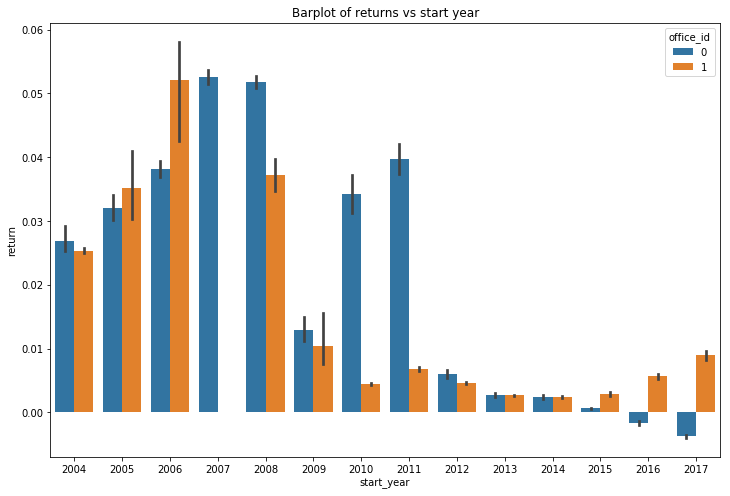

In [1857]:
plt.figure(figsize = (12, 8))
sns.barplot(x_train.start_year, y_train, hue = x_train.office_id)
plt.title('Barplot of returns vs start year')
plt.show()

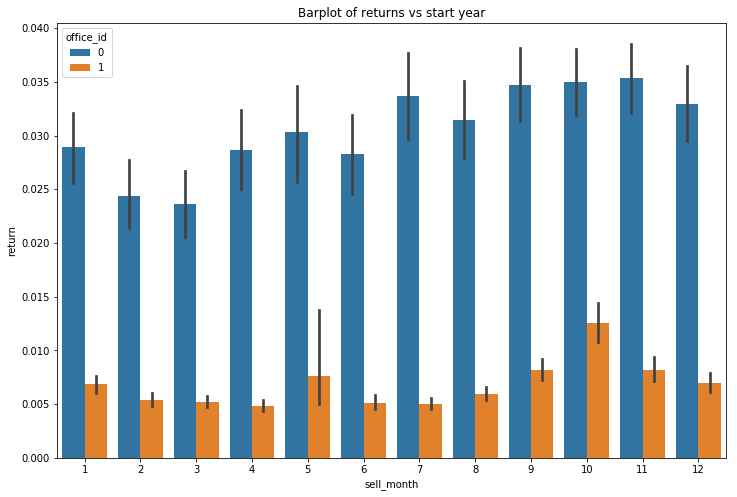

In [1858]:
plt.figure(figsize = (12, 8))
sns.barplot(x_train.sell_month, y_train, hue = x_train.office_id)
plt.title('Barplot of returns vs start year')
plt.show()

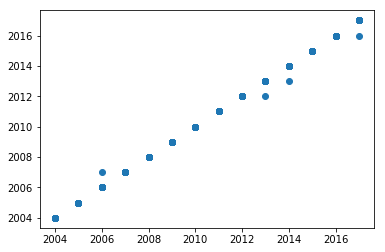

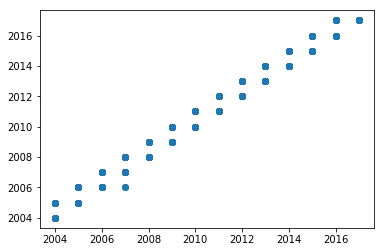

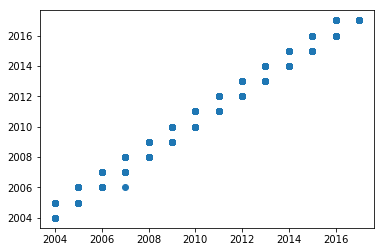

In [1859]:
plt.scatter(x_train.start_year, x_train.creation_year)
plt.show()

plt.scatter(x_train.creation_year, x_train.sell_year)
plt.show()

plt.scatter(x_train.start_year, x_train.sell_year)
plt.show()

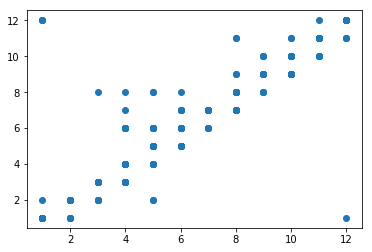

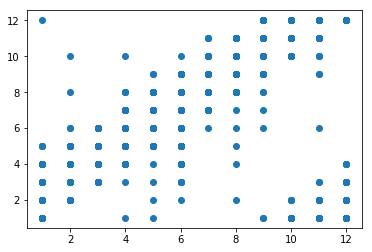

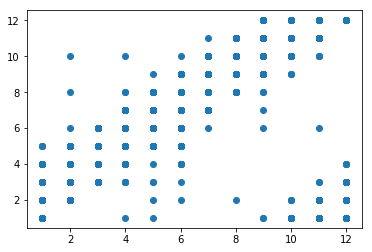

In [1860]:
plt.scatter(x_train.start_month, x_train.creation_month)
plt.show()

plt.scatter(x_train.creation_month, x_train.sell_month)
plt.show()

plt.scatter(x_train.start_month, x_train.sell_month)
plt.show()

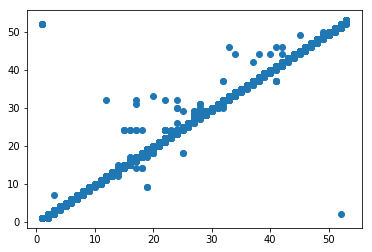

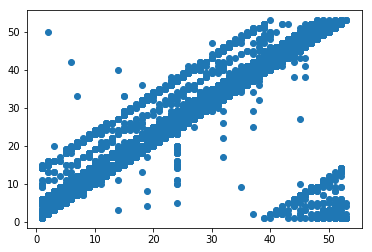

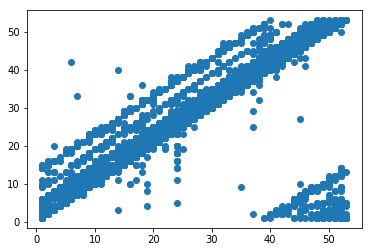

In [1861]:
plt.scatter(x_train.start_week, x_train.creation_week)
plt.show()

plt.scatter(x_train.creation_week, x_train.sell_week)
plt.show()

plt.scatter(x_train.start_week, x_train.sell_week)
plt.show()

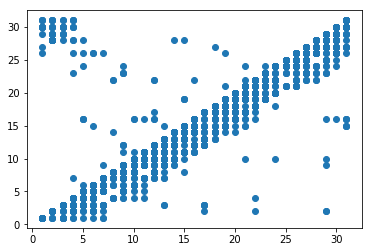

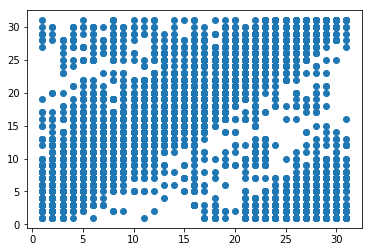

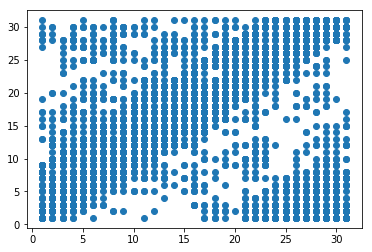

In [1862]:
plt.scatter(x_train.start_day, x_train.creation_day)
plt.show()

plt.scatter(x_train.creation_day, x_train.sell_day)
plt.show()

plt.scatter(x_train.start_day, x_train.sell_day)
plt.show()

In [1863]:
from sklearn.linear_model import LinearRegression

In [1864]:
x_train.describe()

,office_id,pf_category,sold,country_code,euribor_rate,libor_rate,bought,type,start_year,start_month,start_week,start_day,creation_year,creation_month,creation_week,creation_day,sell_year,sell_month,sell_week,sell_day
count,6743.000000,6743.000000,6.743000e+03,6743.000000,6743.000000,6743.000000,6.743000e+03,6743.000000,6743.000000,6743.000000,6743.000000,6743.000000,6743.000000,6743.000000,6743.000000,6743.000000,6743.000000,6743.000000,6743.000000,6743.000000
mean,0.691680,1.409907,1.019143e+08,0.914578,0.009418,0.979260,1.018306e+08,2.693608,2011.641109,6.805724,27.699244,15.409758,2011.640813,6.807801,27.702061,15.296456,2011.705621,6.808097,27.793415,15.762124
std,0.461834,0.925673,2.095233e+08,1.168330,0.013351,1.427765,2.094699e+08,1.758692,3.049271,3.417795,14.940672,8.455397,3.048652,3.418564,14.950112,8.436480,3.056587,3.402576,14.880106,8.486369
min,0.000000,0.000000,1.100000e+00,0.000000,-0.003740,-0.667095,1.099698e+00,0.000000,2004.000000,1.000000,1.000000,1.000000,2004.000000,1.000000,1.000000,1.000000,2004.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,2.750000e+07,0.000000,0.000980,0.251105,2.749953e+07,1.000000,2010.000000,4.000000,15.000000,8.000000,2010.000000,4.000000,15.000000,8.000000,2010.000000,4.000000,15.000000,9.000000
50%,1.000000,2.000000,5.500000e+07,0.000000,0.004390,0.531493,5.500105e+07,4.000000,2011.000000,7.000000,28.000000,15.000000,2011.000000,7.000000,28.000000,15.000000,2011.000000,7.000000,29.000000,15.000000
75%,1.000000,2.000000,1.122825e+08,2.000000,0.013510,1.071188,1.122176e+08,4.000000,2014.000000,10.000000,41.000000,22.000000,2014.000000,10.000000,41.000000,22.000000,2014.000000,10.000000,41.000000,23.000000
max,1.000000,4.000000,1.320000e+10,4.000000,0.050880,6.379137,1.320000e+10,7.000000,2017.000000,12.000000,53.000000,31.000000,2017.000000,12.000000,53.000000,31.000000,2017.000000,12.000000,53.000000,31.000000


In [1865]:
import xgboost as xgb

In [1866]:
from sklearn.metrics import r2_score

In [1867]:
params = {"objective":"reg:linear",
          "booster":"dart",
          "eta":0.1,
          "max_depth": 5,
         "subsample":0.85,
         "silent":0,
         "seed":0,
         "lambda":0.2,
         "alpha":0.01,
         'skip_drop': 0.5,
         "eval_metric":"rmse"}

num_boost_round = 150

dtrain = xgb.DMatrix(x_train, y_train)
dvalid = xgb.DMatrix(x_val, y_val)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

booster = xgb.train(params, dtrain, num_boost_round, evals = watchlist)

[0]	train-rmse:0.437628	eval-rmse:0.437769
[1]	train-rmse:0.393907	eval-rmse:0.39401
[2]	train-rmse:0.354547	eval-rmse:0.354635
[3]	train-rmse:0.319134	eval-rmse:0.319202
[4]	train-rmse:0.287272	eval-rmse:0.287319
[5]	train-rmse:0.258601	eval-rmse:0.258632
[6]	train-rmse:0.232796	eval-rmse:0.232811
[7]	train-rmse:0.209584	eval-rmse:0.209566
[8]	train-rmse:0.188676	eval-rmse:0.188644
[9]	train-rmse:0.169878	eval-rmse:0.16982
[10]	train-rmse:0.15297	eval-rmse:0.152886
[11]	train-rmse:0.137763	eval-rmse:0.137651
[12]	train-rmse:0.124086	eval-rmse:0.123939
[13]	train-rmse:0.111777	eval-rmse:0.111588
[14]	train-rmse:0.100703	eval-rmse:0.100473
[15]	train-rmse:0.090749	eval-rmse:0.090483
[16]	train-rmse:0.081805	eval-rmse:0.08149
[17]	train-rmse:0.073772	eval-rmse:0.073405
[18]	train-rmse:0.066554	eval-rmse:0.066137
[19]	train-rmse:0.060061	eval-rmse:0.059588
[20]	train-rmse:0.054231	eval-rmse:0.053699
[21]	train-rmse:0.049005	eval-rmse:0.048399
[22]	train-rmse:0.044318	eval-rmse:0.043658
[2

In [1868]:
xgb_pred_train = booster.predict(xgb.DMatrix(x_train))
xgb_pred_val = booster.predict(xgb.DMatrix(x_val))
xgb_pred_test = booster.predict(xgb.DMatrix(x_test))

In [1869]:
print('R2-score (XGB) =', r2_score(y_test, xgb_pred_test))

R2-score (XGB) = 0.97563093256


In [1870]:
residuals = []
for i in range(len(y_test)):
    residuals.append(y_test[i]-xgb_pred_test[i])

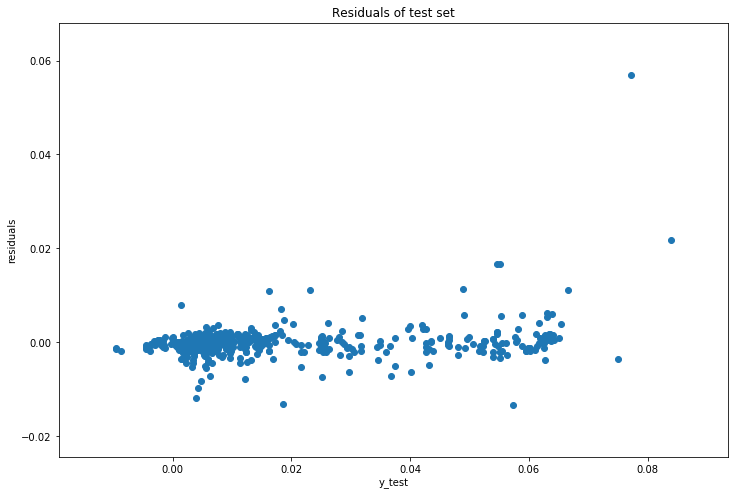

In [1877]:
plt.figure(figsize = (12,8))
plt.scatter(y_test, residuals)
plt.title('Residuals of test set')
plt.xlabel('y_test')
plt.ylabel('residuals')
plt.show()

In [1872]:
prediction = booster.predict(xgb.DMatrix(test_set))
submission['return'] = pd.DataFrame({'return':prediction})

In [1873]:
submission.head()

,portfolio_id,return
0,PF00001001,0.023959
1,PF00001004,0.022623
2,PF00001009,0.027459
3,PF00001013,0.029080
4,PF00001014,0.024796


In [1874]:
submission.to_csv('sub5.csv', index = False)

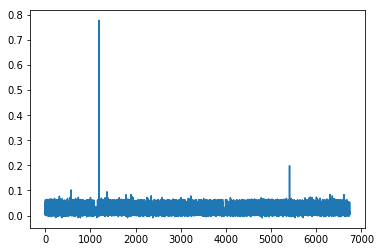

In [1875]:
plt.plot(y_train)
plt.show()